In [4]:
suppressPackageStartupMessages({
    library(ggplot2)
    library(cowplot)
    library(devtools)
    library(dplyr)
    library(magrittr)
})

suppressMessages({
  load_all()
  load_arial_font()
})

In [5]:
nsclc_dir <- CachePath('nsclc_scaled_dat11/')
oc_dir <- CachePath('OC_scaled_dat6/')
gut_dir <- CachePath('gut_scaled_dat6/')
bc_dir <- CachePath('BC_scaled_dat4/')
brain_dir <- CachePath('brain_scaled_dat4/')
panc_dir <- CachePath('pancreas_scaled_dat4/')

In [6]:
## load all scores
scores_nsclc <- readRDS(file=paste0(nsclc_dir,'scores_final_df.rds'))
scores_oc <- readRDS(file=paste0(oc_dir,'scores_final_df.rds'))
scores_gut <- readRDS(file=paste0(gut_dir,'scores_final_df.rds'))
scores_bc <- readRDS(file=paste0(bc_dir,'scores_final_df.rds'))
scores_brain <- readRDS(file=paste0(brain_dir,'scores_final_df.rds'))
scores_panc <- readRDS(file=paste0(panc_dir,'scores_final_df.rds'))

p_nsclc <- plot_ct_av_norm_scores(scores_nsclc,trim_level=.9,min_mean_thresh=1e-3,dodge.width=.2)
p_oc <- plot_ct_av_norm_scores(scores_oc,trim_level=.1,
                            min_mean_thresh = 1e-3,dodge.width=.2)
p_gut <- plot_ct_av_norm_scores(scores_gut,trim_level=.1,min_mean_thresh = 1e-3,dodge.width=.2)
p_bc <- plot_ct_av_norm_scores(scores_bc,trim_level=.9,min_mean_thresh = 1e-3,dodge.width=.2)
p_brain <- plot_ct_av_norm_scores(scores_brain,trim_level=.4,min_mean_thresh = 1e-3,dodge.width=.2)
p_panc <- plot_ct_av_norm_scores(scores_panc,trim_level=.1,min_mean_thresh = 1e-3,dodge.width=.2)

all_plts <- list(p_nsclc,p_oc,p_gut,p_bc,p_brain,p_panc)
all_plt_nms <- c('NSCLC dataset - 15 cell types','Ovarian cancer dataset - 15 cell types',
                'Gut dataset - 15 cell types','Breast cancer dataset - 17 cell types',
                'Hypothalamus dataset - 8 cell types','Pancreas dataset - 7 cell types')

In [7]:
title_size <- 14
ax_title_size <- 10
ax_text_size <- 8
leg_text_size <- 8
all_plts <- lapply(1:length(all_plts),function(pndx) {
    p <- all_plts[[pndx]]
    pnm <- all_plt_nms[pndx]
    p <- p +
        ggtitle(pnm) +
        ylab('Mean P_admix clean/unclean') +
        labs(color = "Cell type") +
        xlab('(NMF type)_(# of factors)_(factor annotation method)') +
        p_theme +
        theme(plot.title = element_text(hjust = 0.5,size = title_size,face="bold"),
            axis.title.x = element_text(size = ax_title_size),
            axis.text.x = element_text(size = ax_text_size),
            axis.title.y = element_text(size = ax_title_size),
            axis.text.y = element_text(size = ax_text_size),
            legend.text = element_text(size = leg_text_size))
    return(p)
})

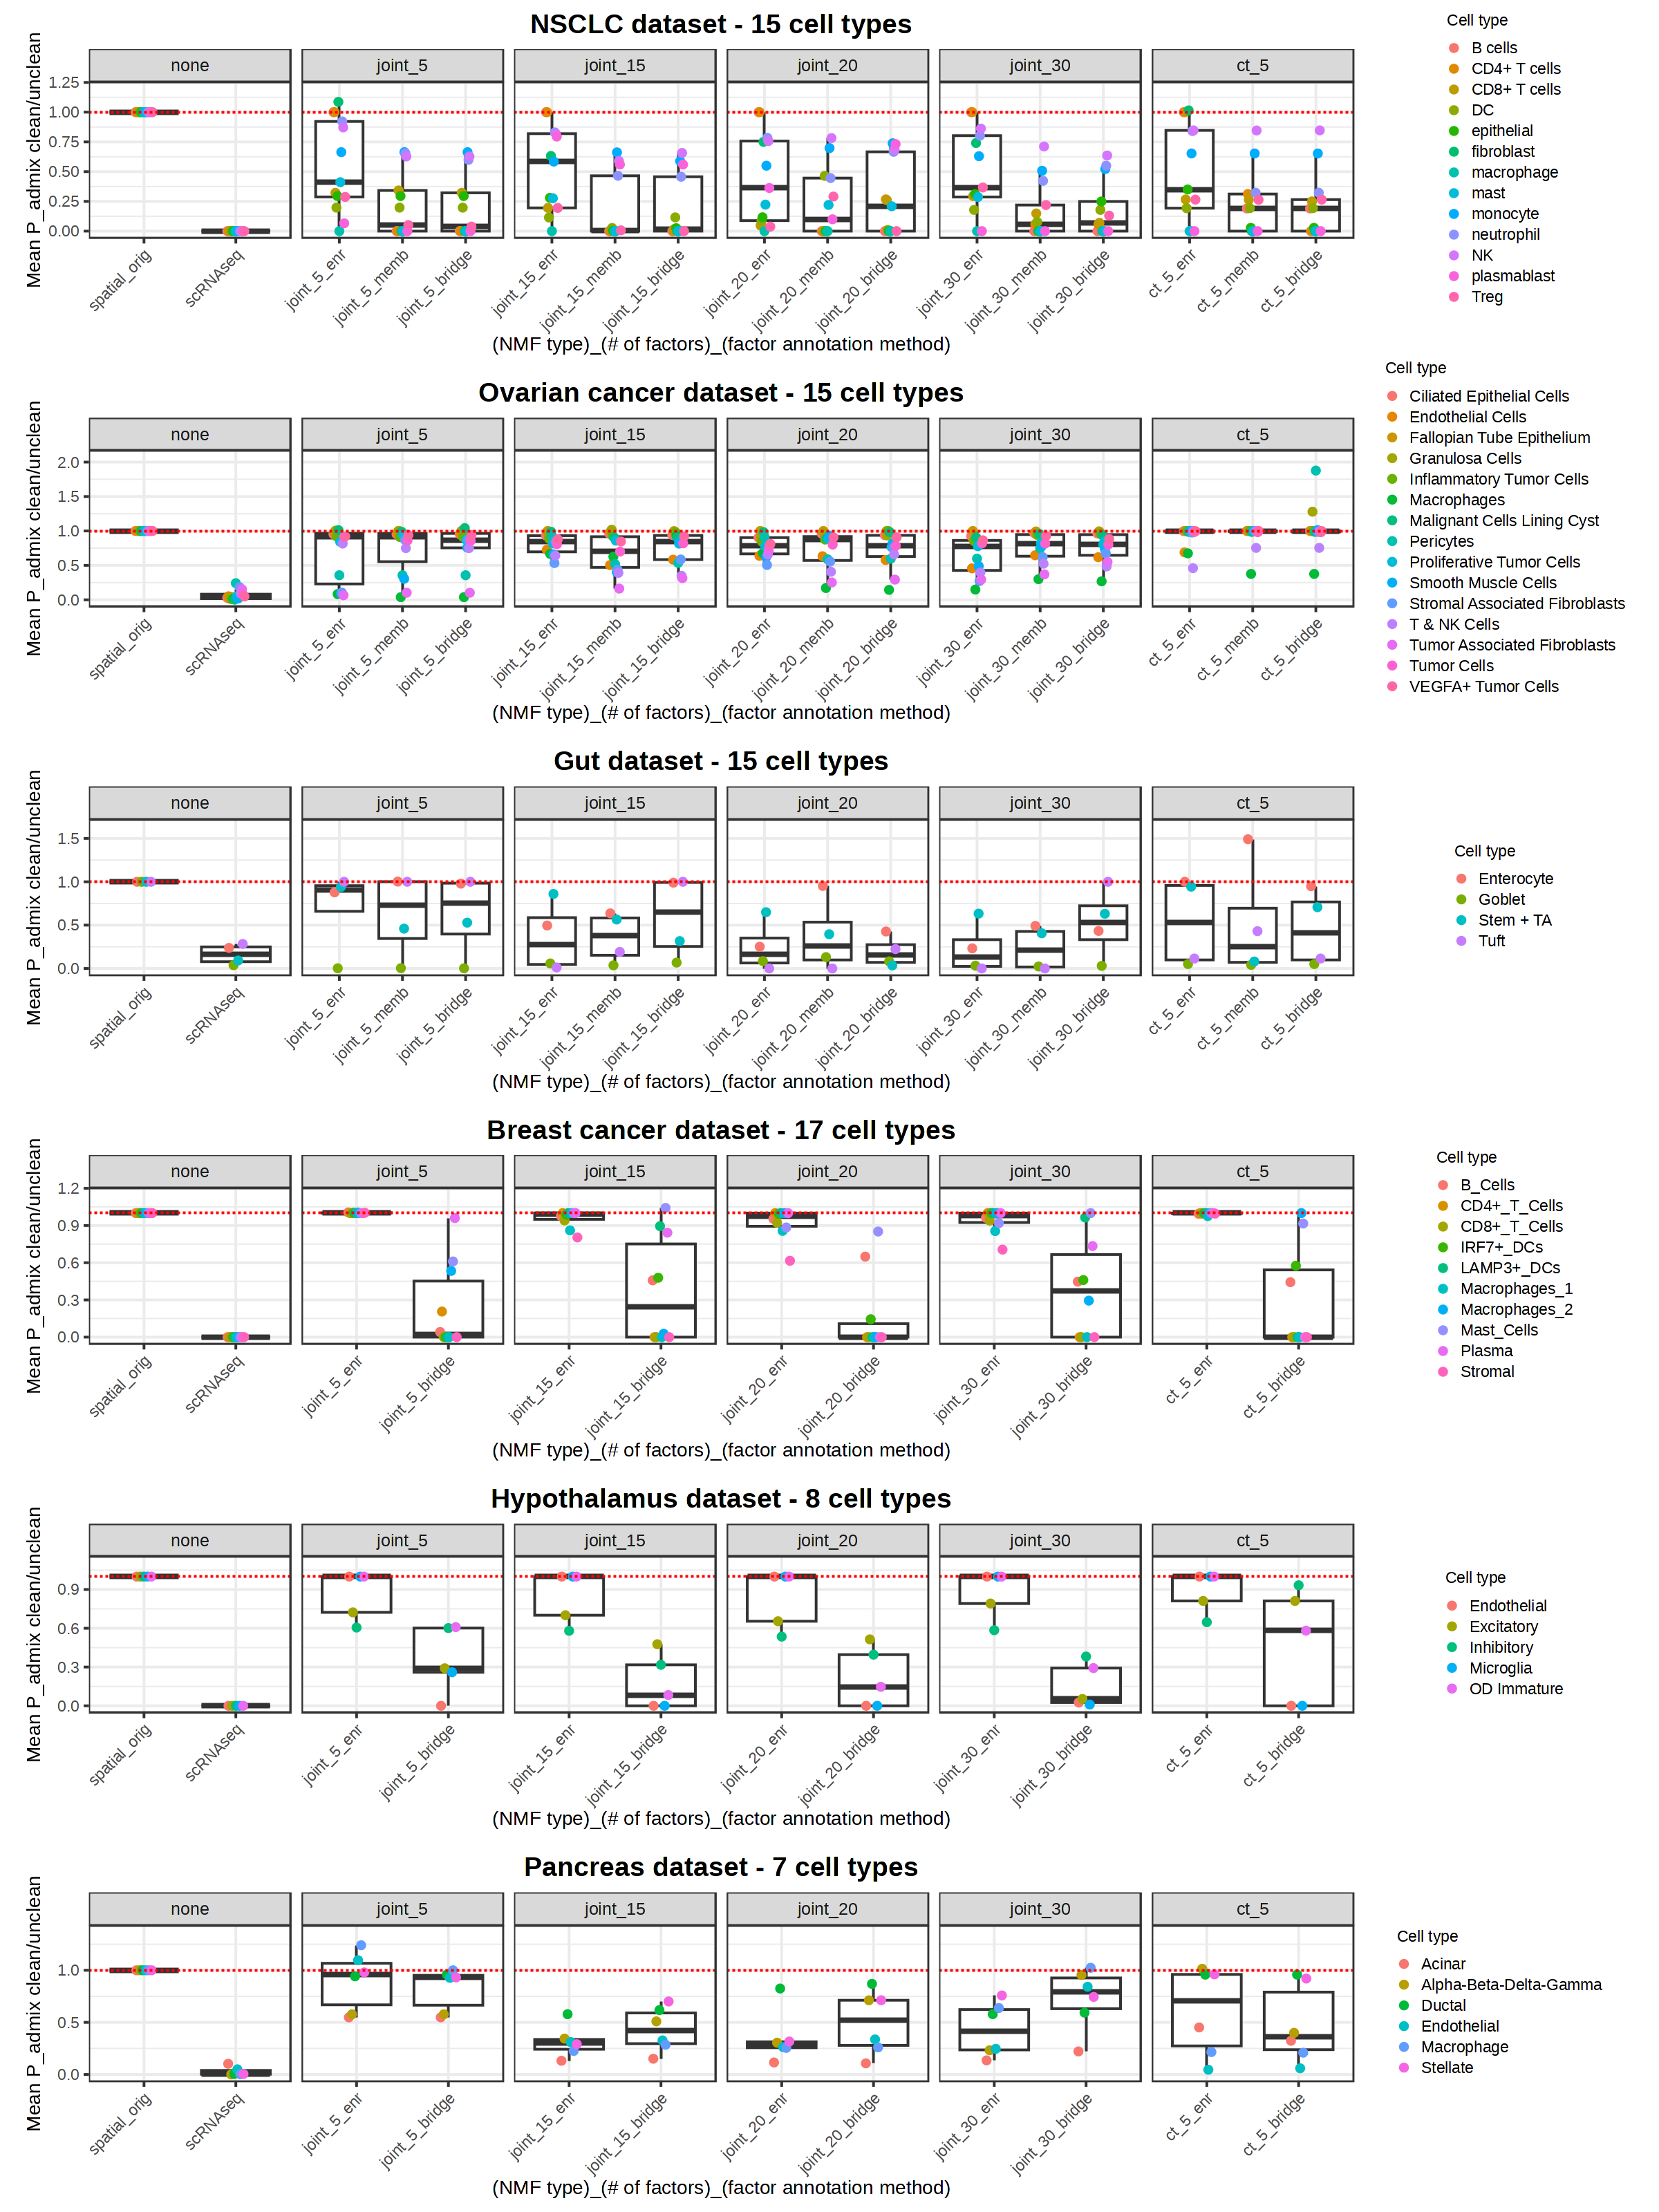

In [9]:
options(repr.plot.width = 12, repr.plot.height = 16, repr.plot.res = 200)

fig <- plot_grid(plotlist=all_plts,ncol=1,align='v',scale = 0.98)
fig

In [10]:
pdf(OutputPath("benchmark_comparisons_update4.pdf"), useDingbats=FALSE, width=12, height=16)
fig
dev.off()

png 
  2